In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv("movies_genre.csv")
df.head()

Saving movies_genre.csv to movies_genre (1).csv


,Unnamed: 0,genre_ids,overview,title,Western,Romance,Horror,TV Movie,Fantasy,Drama,...,Music,History,Thriller,Comedy,Crime,Mystery,Action,Animation,Family,Adventure
0,0,"['Drama', 'Crime']","Spanning the years 1945 to 1955, a chronicle o...",The Godfather,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,"['Action', 'Adventure', 'Animation', 'Science ...","After reuniting with Gwen Stacy, Brooklyn’s fu...",Spider-Man: Across the Spider-Verse,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,2,"['Drama', 'Crime']",Framed in the 1940s for the double murder of h...,The Shawshank Redemption,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,3,"['Drama', 'Crime']",In the continuing saga of the Corleone crime f...,The Godfather Part II,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,4,"['Comedy', 'Drama', 'Romance']","Raj is a rich, carefree, happy-go-lucky second...",Dilwale Dulhania Le Jayenge,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np

# Step 2: Load the dataset
file_path = "/content/movies_genre.csv"  # Update if necessary
df = pd.read_csv(file_path)

# Step 3: View basic info
print("First 5 rows of the dataset:")
print(df.head())
print("\nSummary:")
print(df.info())

# Step 4: Check for null values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Step 5: Drop rows with too many missing values (optional threshold)
df_cleaned = df.dropna(thresh=int(df.shape[1] * 0.5))  # Keep rows with at least 50% data

# Step 6: Fill missing values
# You can use different strategies based on column types:
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == "object":
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])
    else:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Step 7: Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Step 8: Standardize column names
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 9: Preview cleaned data
print("\nCleaned data preview:")
print(df_cleaned.head())

# Step 10: Save cleaned data (optional)
df_cleaned.to_csv("/content/movies_genre_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'movies_genre_cleaned.csv'")
from google.colab import files
files.download('movies_genre_cleaned.csv')

First 5 rows of the dataset:
   Unnamed: 0                                          genre_ids  \
0           0                                 ['Drama', 'Crime']   
1           1  ['Action', 'Adventure', 'Animation', 'Science ...   
2           2                                 ['Drama', 'Crime']   
3           3                                 ['Drama', 'Crime']   
4           4                     ['Comedy', 'Drama', 'Romance']   

                                            overview  \
0  Spanning the years 1945 to 1955, a chronicle o...   
1  After reuniting with Gwen Stacy, Brooklyn’s fu...   
2  Framed in the 1940s for the double murder of h...   
3  In the continuing saga of the Corleone crime f...   
4  Raj is a rich, carefree, happy-go-lucky second...   

                                 title  Western  Romance  Horror  TV Movie  \
0                        The Godfather        0        0       0         0   
1  Spider-Man: Across the Spider-Verse        0        0       0     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 9: Preview cleaned data
print("\nCleaned data preview:")
print(df_cleaned.head())



Cleaned data preview:
   unnamed:_0                                          genre_ids  \
0           0                                 ['Drama', 'Crime']   
1           1  ['Action', 'Adventure', 'Animation', 'Science ...   
2           2                                 ['Drama', 'Crime']   
3           3                                 ['Drama', 'Crime']   
4           4                     ['Comedy', 'Drama', 'Romance']   

                                            overview  \
0  Spanning the years 1945 to 1955, a chronicle o...   
1  After reuniting with Gwen Stacy, Brooklyn’s fu...   
2  Framed in the 1940s for the double murder of h...   
3  In the continuing saga of the Corleone crime f...   
4  Raj is a rich, carefree, happy-go-lucky second...   

                                 title  western  romance  horror  tv_movie  \
0                        The Godfather        0        0       0         0   
1  Spider-Man: Across the Spider-Verse        0        0       0         0 

<ipython-input-76-c78b275c9948>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_id_counts.index, y=genre_id_counts.values, palette="magma")


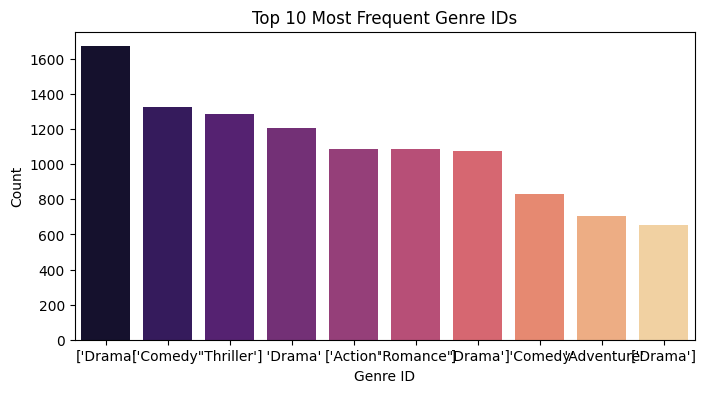

In [ ]:
# Explode genre_ids
df['genre_ids'] = df['genre_ids'].astype(str)
genre_id_counts = df['genre_ids'].str.split(',').explode().value_counts().head(10)

# Plot the most frequent genre IDs
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_id_counts.index, y=genre_id_counts.values, palette="magma")
plt.title("Top 10 Most Frequent Genre IDs")
plt.xlabel("Genre ID")
plt.ylabel("Count")
plt.show()


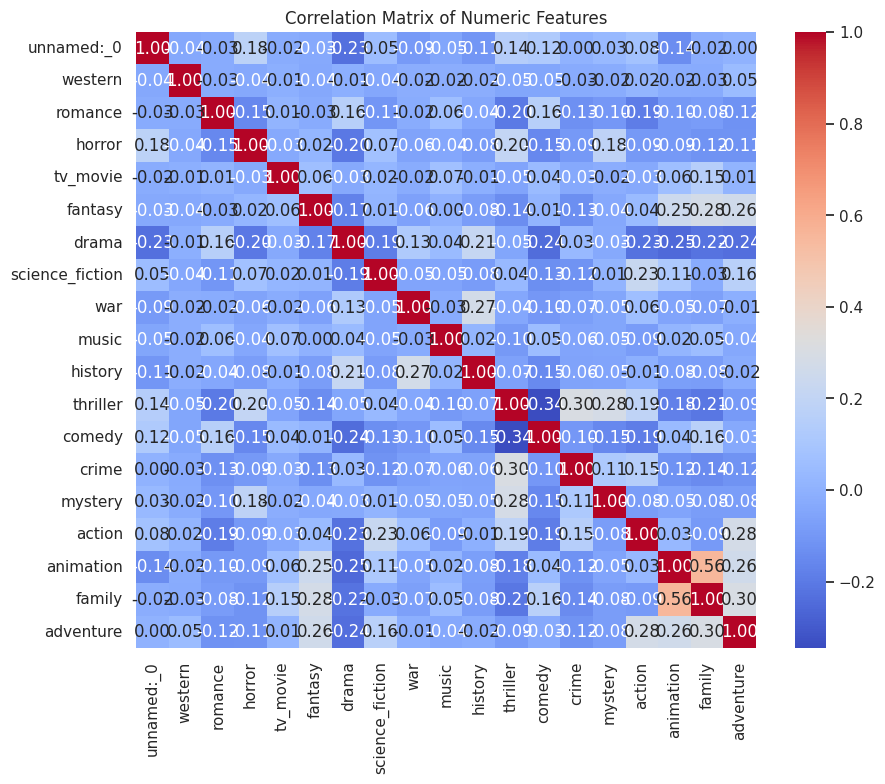

In [ ]:
# Bivariate / Multivariate Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("/content/movies_genre_cleaned.csv")

# Example 1: Boxplot of duration by genre
if 'genre' in df.columns and 'duration' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='genre', y='duration', palette='Pastel1')
    plt.xticks(rotation=45)
    plt.title('Movie Duration by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Duration (minutes)')
    plt.show()

# Example 2: Correlation heatmap (only for numerical columns)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()
